## DATA IMPORT

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score

In [17]:
df = pd.read_csv('address_cleaned.csv')
df

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Activo,Egresado_Egresado,Egresado_Retirado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
157,Bootcamp en Data Science y Machine Learning en...,gmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,Bootcamp en Data Science y Machine Learning en...,hotmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [18]:
df["Egresado_Activo"].value_counts()

0.0    142
1.0     18
Name: Egresado_Activo, dtype: int64

Se eliminara la columna de egresados activos porque no existe una correlacion con el la columna objetivo. 

In [19]:
df = df.drop(df.loc[df["Egresado_Activo"] == 1].index)

In [20]:
df["Egresado_Activo"].value_counts()

0.0    142
Name: Egresado_Activo, dtype: int64

In [21]:
df1=df.drop(columns=["Egresado_Activo","Egresado_Retirado"])
df1.head()

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Egresado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0


In [22]:
df1.shape

(142, 15)

In [23]:
df1.isna().sum()

Entrenamiento                     0
Email                             0
Precios US                        0
Ubicacion                         0
Incluye pasantia                  0
Metodo de pago                    0
Estatus laboral                   0
Razon de eleccion del bootcamp    0
Proveedores de bootcamp           0
Horario de los bootcamps          0
Egresado_Egresado                 0
Primer contacto_Instagram         0
Primer contacto_WhatsApp          0
Condiciones de pago_Completo      0
Condiciones de pago_Cuotas        0
dtype: int64

## TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split

X = df1.drop('Egresado_Egresado', axis=1)
y = df1['Egresado_Egresado']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego, dividimos el conjunto de prueba en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", len(X_train))
print("Tamaño del conjunto de validación (X_val):", len(X_val))
print("Tamaño del conjunto de prueba (X_test):", len(X_test))
print("Tamaño del conjunto de entrenamiento (y_train):", len(y_train))
print("Tamaño del conjunto de validación (y_val):", len(y_val))
print("Tamaño del conjunto de prueba (y_test):", len(y_test))

Tamaño del conjunto de entrenamiento (X_train): 99
Tamaño del conjunto de validación (X_val): 21
Tamaño del conjunto de prueba (X_test): 22
Tamaño del conjunto de entrenamiento (y_train): 99
Tamaño del conjunto de validación (y_val): 21
Tamaño del conjunto de prueba (y_test): 22


In [25]:
X_test.shape

(22, 14)

In [26]:
X_train.shape

(99, 14)

## PREPROCESING

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [28]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
#Pipe
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

## Modelos

In [29]:
class Models:

    def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

        self.xtrain = Xtrain_processed
        self.xtest = Xtest_processed
        self.ytrain = ytrain
        self.ytest = ytest

  
    def randomForestModel(self,estimators=100,depth=1):
    
        for inc in range(0,depth):
            lgreg = RandomForestRegressor(n_estimators=estimators, max_depth=inc+1)
            lgreg.fit(X_train_processed,y_train)

            X_train_lg = lgreg.score(self.xtrain, y_train)
            X_test_lg = lgreg.score(self.xtest, y_test)

            pred = lgreg.predict(self.xtrain)

            print('\n************Max depth #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
            print('Rendimiendo datos de prueba:', X_test_lg, '\n')
            print(' R2 coeficiente de los datos de entrenamiento: ',r2_score(self.ytrain, pred),'\n')       
            print('\nMean absolute error: \n',mean_absolute_error(pred,self.ytrain))
            print('\nMean squared error: \n',mean_squared_error(pred,self.ytrain))
            print('\nResidual sum of squares: \n',mean_squared_error(pred,self.ytrain) * len(pred))
            print('\nRoot Mean Squared Error: \n',mean_squared_error(pred,self.ytrain, squared=False))
            print('Predicciones de los datos de entrenamiento: \n\n',pred)

        return pred

    def LinealRegression(self):

        reg = LinearRegression()
        reg.fit(self.xtrain,self.ytrain)

        train_score = reg.score(self.xtrain, self.ytrain)
        test_score =  reg.score(self.xtest, self.ytest)

        ypred_train = reg.predict(self.xtrain)


        r2_train = r2_score(self.ytrain, ypred_train)

        print('Rendimiendo datos de entremaniento:',train_score, '\n')
        print('Rendimiendo datos de prueba:', test_score, '\n')
        print(' R2 coeficiente de los datos de entrenamiento: ',r2_train,'\n')
        print('Predicciones de los datos de entrenamiento: \n\n',ypred_train)
        print('\nMean absolute error: \n',mean_absolute_error(ypred_train,self.ytrain))
        print('\nMean squared error: \n',mean_squared_error(ypred_train,self.ytrain))
        print('\nRoot Mean Squared Error: \n',mean_squared_error(ypred_train,self.ytrain, squared=False))


        return ypred_train
        
    def knn(self,neighbors=1):

        for inc in range(0,neighbors):
            knn =  KNeighborsRegressor(n_neighbors=inc+1)
            knn.fit(self.xtrain, y_train)
            knn_score_train = knn.score(self.xtrain, self.ytrain)
            knn_score_test = knn.score(self.xtest, self.ytest)
            
            knn_predict =  knn.predict(self.xtest)
            knn_accuracy = accuracy_score(self.ytest,knn_predict)
            print('\n************N neighbors #',inc+1,'**************')
            print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
            print('Rendimiendo datos de prueba:', knn_score_test, '\n')
            print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)
            print('Precicion de los datos : \n\n',knn_accuracy)

        return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

In [30]:
chooseModel.knn(30)


************N neighbors # 1 **************

Rendimiendo datos de entremaniento: 0.6449067431850789 

Rendimiendo datos de prueba: -0.5277777777777779 

Predicciones de los datos de entrenamiento: 

 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
Precicion de los datos : 

 0.7727272727272727


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [31]:
#Modelo Arboles de Decision
from sklearn.tree import DecisionTreeClassifier

In [32]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [33]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [34]:
y_dec_tree_pred = dec_tree.predict(X_test_processed)

In [35]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.8484848484848485
0.8181818181818182


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [51]:
#Red neuronal 1

In [65]:
input_shape = X_train_processed.shape[1]
input_shape

42

In [66]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, input_dim = input_shape, activation = 'relu'))
# Second hidden layer
model.add(Dense(10, activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = 'accuracy')

In [67]:
# Fit our model
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 67ms/step - loss: 0.6995 - accuracy: 0.4444 - val_loss: 0.7392 - val_accuracy: 0.6364
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6688 - accuracy: 0.6364 - val_loss: 0.7251 - val_accuracy: 0.6364
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6386 - accuracy: 0.6869 - val_loss: 0.7110 - val_accuracy: 0.6364
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 0.6147 - accuracy: 0.7172 - val_loss: 0.6984 - val_accuracy: 0.5909
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.5922 - accuracy: 0.7172 - val_loss: 0.6877 - val_accuracy: 0.5909
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.5756 - accuracy: 0.7778 - val_loss: 0.6787 - val_accuracy: 0.7727
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.5600 - accuracy: 0.7980 - val_loss: 0.6685 - val_accuracy: 0.7727
Epoch 8/10
4/4 [===========

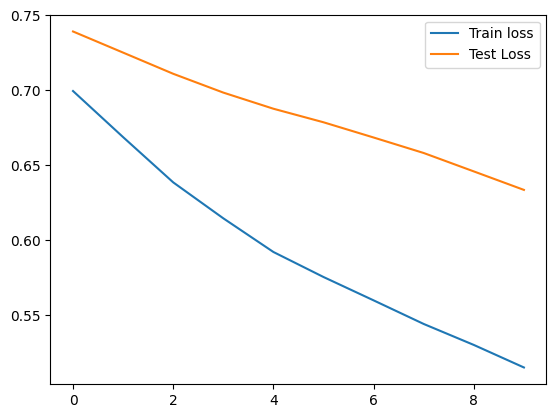

In [69]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

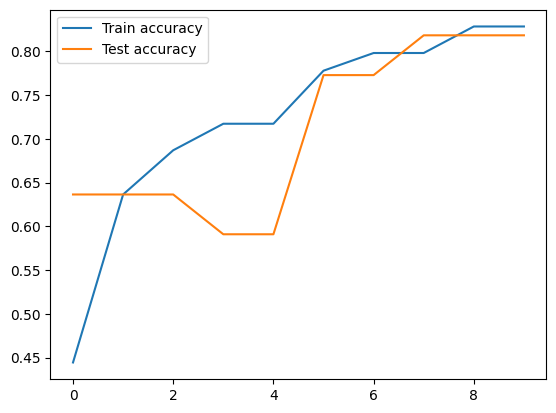

In [70]:
# Visualize the accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [57]:
predictions = model.predict(X_test_processed)
prediction=np.round(predictions)
print(classification_report(prediction, y_test))

1/1 [==============================] - 0s 61ms/step
              precision    recall  f1-score   support

         0.0       0.25      1.00      0.40         1
         1.0       1.00      0.86      0.92        21

    accuracy                           0.86        22
   macro avg       0.62      0.93      0.66        22
weighted avg       0.97      0.86      0.90        22



In [58]:
#Red Neuronal 2

In [59]:
# Sequential model
model2 = Sequential()
# First hidden layer
model2.add(Dense(40, input_dim = input_shape, activation = 'relu'))
# Second hidden layer
model2.add(Dense(20, activation = 'relu'))
# Output layer
model2.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model2.compile(loss = 'bce', optimizer = 'adam', metrics = 'accuracy')

In [60]:
# Fit our model
history2 = model2.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 66ms/step - loss: 0.7766 - accuracy: 0.3737 - val_loss: 0.7410 - val_accuracy: 0.2727
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 0.7045 - accuracy: 0.4949 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6519 - accuracy: 0.6970 - val_loss: 0.6612 - val_accuracy: 0.6818
Epoch 4/20
4/4 [==============================] - 0s 20ms/step - loss: 0.6070 - accuracy: 0.7879 - val_loss: 0.6374 - val_accuracy: 0.8182
Epoch 5/20
4/4 [==============================] - 0s 18ms/step - loss: 0.5697 - accuracy: 0.8283 - val_loss: 0.6144 - val_accuracy: 0.8182
Epoch 6/20
4/4 [==============================] - 0s 18ms/step - loss: 0.5390 - accuracy: 0.8283 - val_loss: 0.5944 - val_accuracy: 0.8182
Epoch 7/20
4/4 [==============================] - 0s 20ms/step - loss: 0.5150 - accuracy: 0.8283 - val_loss: 0.5771 - val_accuracy: 0.8182
Epoch 8/20
4/4 [===========

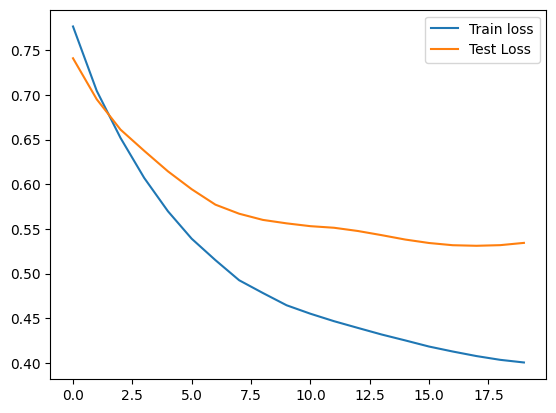

In [61]:
# Visualize the loss
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

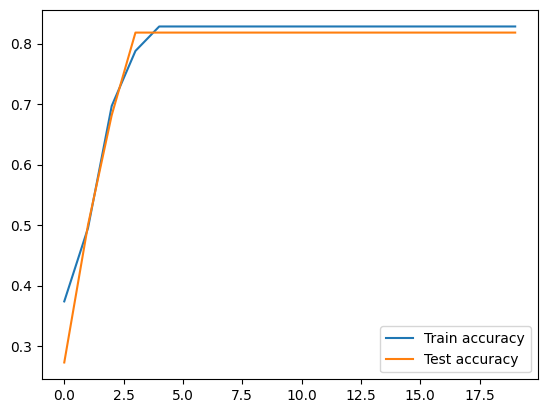

In [62]:
# Visualize the accuracy
plt.plot(history2.history['accuracy'], label='Train accuracy')
plt.plot(history2.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [63]:
predictions = model2.predict(X_test_processed)
prediction=np.round(predictions)
print(classification_report(prediction, y_test))

1/1 [==============================] - 0s 64ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.82      0.90        22

    accuracy                           0.82        22
   macro avg       0.50      0.41      0.45        22
weighted avg       1.00      0.82      0.90        22



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
